In [1]:
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
import os
from deepxde.backend import pytorch

No backend selected.
Finding available backend...


Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Found pytorch
Setting the default backend to "pytorch". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


In [2]:
geom = dde.geometry.Rectangle([-1,-1],[1,1])
timedomain = dde.geometry.TimeDomain(0,10)
geomtime = dde.geometry.GeometryXTime(geom,timedomain)

In [3]:
alpha = 0.5
def pde(x,y):
    dy_t = dde.grad.jacobian(y,x,i=0,j=2)
    dy_xx = dde.grad.hessian(y,x,i=0,j=0)
    dy_yy = dde.grad.hessian(y,x,i=1,j=1)
    return dy_t - alpha * (dy_xx + dy_yy)

In [4]:
# 上边界，y=1
def boundary_t(x, on_boundary):
    return on_boundary and np.isclose(x[1], 1)

# 下边界，y=-1
def boundary_b(x, on_boundary):
    return on_boundary and np.isclose(x[1], -1)

# 左边界，x=-1
def boundary_l(x, on_boundary):
    return on_boundary and np.isclose(x[0], -1)

# 右边界，x=1
def boundary_r(x, on_boundary):
    return on_boundary and np.isclose(x[0], 1)

bc_t = dde.icbc.NeumannBC(geomtime, lambda x:0, boundary_t)
bc_b = dde.icbc.NeumannBC(geomtime, lambda x:20, boundary_b)
bc_l = dde.icbc.DirichletBC(geomtime, lambda x:30, boundary_l)
bc_r = dde.icbc.DirichletBC(geomtime, lambda x:50, boundary_r)

In [5]:
def init_func(x):
    return 0

ic = dde.icbc.IC(geomtime,init_func,lambda _,on_initial:on_initial,)

In [6]:
data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc_l,bc_r,bc_b,bc_t,ic],
    num_domain=8000,
    num_boundary=320,
    num_initial=800,
    num_test=8000,
)

layer_size = [3] + [50] * 4 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001)

Compiling model...
'compile' took 3.887444 s



Training model...



/house/lihaoyang/anaconda3/envs/SGA-PDE/lib/python3.11/site-packages/torch/autograd/graph.py:744: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1718580740865/work/aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Step      Train loss                                                      Test loss                                                       Test metric
0         [1.25e-02, 9.24e+02, 2.55e+03, 3.97e+02, 1.80e-03, 4.48e-03]    [1.09e-02, 9.24e+02, 2.55e+03, 3.97e+02, 1.80e-03, 4.48e-03]    []  
1000      [3.28e+01, 1.24e+01, 7.46e+01, 1.91e+01, 6.29e-01, 7.68e+00]    [2.49e+01, 1.24e+01, 7.46e+01, 1.91e+01, 6.29e-01, 7.68e+00]    []  
2000      [9.09e+00, 3.65e+00, 2.01e+00, 3.50e+00, 7.57e-01, 1.98e+00]    [6.66e+00, 3.65e+00, 2.01e+00, 3.50e+00, 7.57e-01, 1.98e+00]    []  
3000      [2.16e+00, 1.78e+00, 9.69e-01, 4.87e-01, 4.89e-01, 1.24e+00]    [1.41e+00, 1.78e+00, 9.69e-01, 4.87e-01, 4.89e-01, 1.24e+00]    []  
4000      [7.21e-01, 7.63e-01, 2.71e-01, 1.14e-01, 3.08e-01, 6.20e-01]    [7.92e-01, 7.63e-01, 2.71e-01, 1.14e-01, 3.08e-01, 6.20e-01]    []  
5000      [5.53e-01, 4.22e-01, 1.86e-01, 8.03e-02, 2.65e-01, 2.63e-01]    [9.59e-01, 4.22e-01, 1.86e-01, 8.03e-02, 2.65e-01, 2.63e-01] 

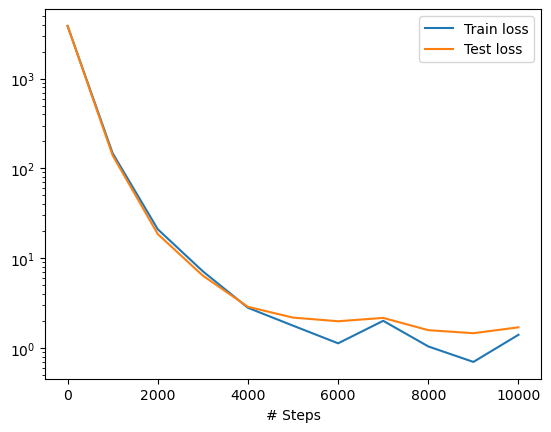

In [7]:
losshistory,train_state = model.train(iterations=10000,display_every=1000)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

(40000, 3) (40000, 1)
(40000, 4, 1) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 2) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 3) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 4) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 5) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 6) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 7) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 8) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 9) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 10) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 11) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 12) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 13) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 14) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 15) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 16) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 17) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 18) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 19) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 20) (40000, 4)
(40000, 3) (40000, 1)
(40000, 4, 21) (40000, 4)
0

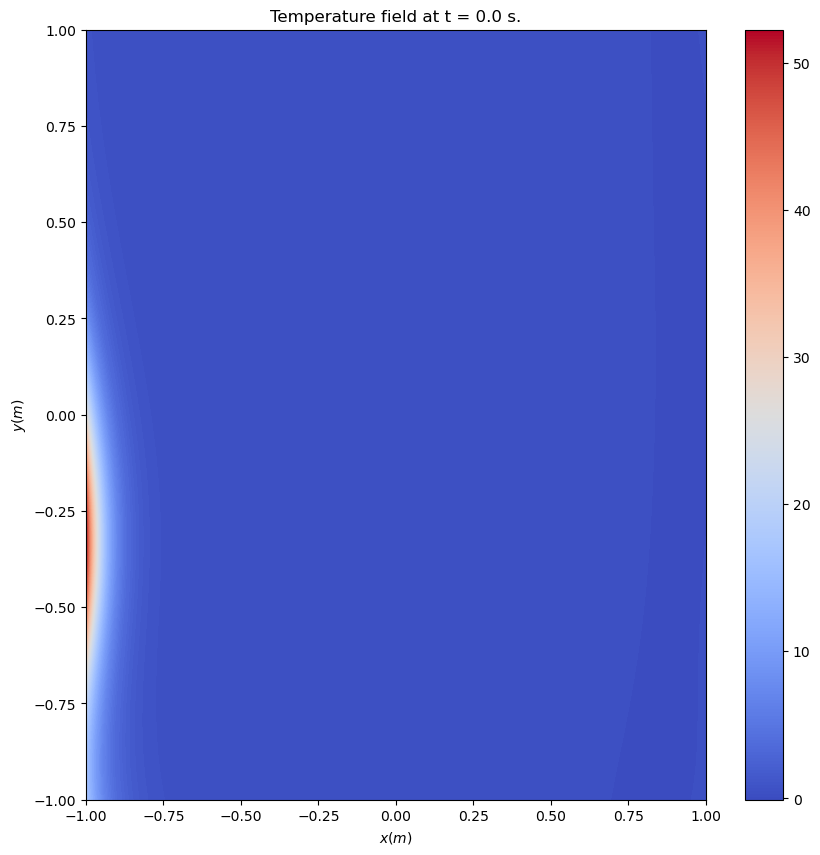

In [9]:
# x,y方向离散200个节点
x1 = np.linspace(-1,1,num=200,endpoint=True).flatten()
y1 = np.linspace(-1,1,num=200,endpoint=True).flatten()
xx1, yy1 = np.meshgrid(x1,y1)
x = xx1.flatten()
y = yy1.flatten()

# 时间上取20个时间步，时间步长1/20=0.05s
Nt = 20
dt = 1/Nt

for n in range(0, Nt+1):
    t = n * dt
    t_list = t*np.ones((len(x), 1))
    x_pred = np.concatenate([x[:, None], y[:, None], t_list], axis=1)
    y_pred = model.predict(x_pred)
    y_p = y_pred.flatten()
    data_n = np.concatenate([x_pred, y_pred], axis=1)
    if n == 0:
        data = data_n[:, :, None]
    else:
        data = np.concatenate([data, data_n[:, :, None]], axis=2)
    print(x_pred.shape, y_pred.shape)
    print(data.shape, data_n.shape)

# 创建图片保存路径
work_path = os.path.join('2DtransientRectTC',)
isCreated = os.path.exists(work_path)
if not isCreated:
    os.makedirs(work_path)
    print("保存路径: " + work_path)

# 获得y的最大值和最小值
y_min = data.min(axis=(0,2,))[3]
y_max = data.max(axis=(0,2,))[3]
fig = plt.figure(100, figsize=(10, 10))

def anim_update(t_id):
    plt.clf()
    x1_t, x2_t, y_p_t = data[:, 0:1, t_id], data[:, 1:2, t_id], data[:, 3:4, t_id]
    x1_t, x2_t, y_p_t = x1_t.flatten(), x2_t.flatten(), y_p_t.flatten()
    print(t_id, x1_t.shape, x1_t.shape, y_p_t.shape)
    plt.subplot(1,1,1)
    plt.tricontourf(x1_t, x2_t, y_p_t, levels=160, cmap="coolwarm")
    cb0 = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=y_min, vmax=y_max), cmap="coolwarm" ),ax = plt.gca())
    plt.xlabel('$x (m)$')
    plt.ylabel('$y (m)$')
    plt.title("Temperature field at t = " + str(round(t_id * dt,2)) + " s.", fontsize = 12)
    plt.savefig(work_path + '//' + 'animation_' + str(t_id) + '.png')
    print("data.shape[2] = ", data.shape[2])

# 创建动画
anim =FuncAnimation(fig, anim_update, frames=np.arange(0, data.shape[2]).astype(np.int64), interval=200)
anim.save(work_path + "//" + "animation-" + str(Nt+1) + ".gif", writer="pillow",dpi=300)